# King-Rook-vs-King
This dataset is a chess database for King & Rook vs King endgames.

* Attributes: 
   1. White King file (column)
   2. White King rank (row)
   3. White Rook file
   4. White Rook rank
   5. Black King file
   6. Black King rank
   7. optimal depth-of-win for White in 0 to 16 moves, otherwise drawn
   
   
* To Predict: Optimal Depth of Win


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = ['white-king-file',
          'white-king-rank',
          'white-rook-file',
          'white-rook-rank',
          'black-king-file',
          'black-king-rank',
          'depth-of-win']

In [3]:
df = pd.read_csv('krkopt.data', header=None, names=columns)

In [4]:
df.head()

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,depth-of-win
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


# Simple EDA

In [5]:
df.describe()

,white-king-rank,white-rook-rank,black-king-rank
count,28056.000000,28056.000000,28056.000000
mean,1.854006,4.512404,4.451811
std,0.926414,2.282723,2.248387
min,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000
50%,2.000000,5.000000,4.000000
75%,2.000000,6.000000,6.000000
max,4.000000,8.000000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   white-king-file  28056 non-null  object
 1   white-king-rank  28056 non-null  int64 
 2   white-rook-file  28056 non-null  object
 3   white-rook-rank  28056 non-null  int64 
 4   black-king-file  28056 non-null  object
 5   black-king-rank  28056 non-null  int64 
 6   depth-of-win     28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [7]:
df.dtypes

white-king-file    object
white-king-rank     int64
white-rook-file    object
white-rook-rank     int64
black-king-file    object
black-king-rank     int64
depth-of-win       object
dtype: object

# Finding Missing/Null

In [8]:
df.isnull().sum()

white-king-file    0
white-king-rank    0
white-rook-file    0
white-rook-rank    0
black-king-file    0
black-king-rank    0
depth-of-win       0
dtype: int64

No Null Values

In [9]:
df.isin(['?']).sum()

white-king-file    0
white-king-rank    0
white-rook-file    0
white-rook-rank    0
black-king-file    0
black-king-rank    0
depth-of-win       0
dtype: int64

No Missing Values

# Finding Duplicates

In [10]:
df.duplicated().sum()

0

No Duplicate Samples

# Checking Unique Values of Columns

In [11]:
for col in df.columns:
    print(col, ': ', df[col].unique())

white-king-file :  ['a' 'b' 'c' 'd']
white-king-rank :  [1 2 3 4]
white-rook-file :  ['b' 'c' 'd' 'e' 'f' 'g' 'h' 'a']
white-rook-rank :  [3 1 2 4 5 6 7 8]
black-king-file :  ['c' 'd' 'e' 'f' 'g' 'h' 'a' 'b']
black-king-rank :  [2 1 3 4 5 6 7 8]
depth-of-win :  ['draw' 'zero' 'one' 'two' 'three' 'four' 'five' 'six' 'seven' 'eight'
 'nine' 'ten' 'eleven' 'twelve' 'thirteen' 'fourteen' 'fifteen' 'sixteen']


There are no abnormal values in any columns

# Plotting Graph for Value Counts of Each Column

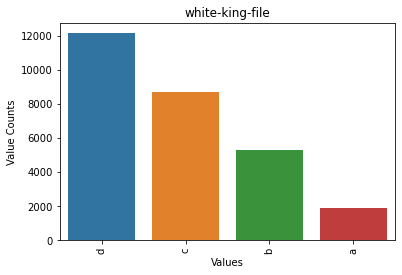

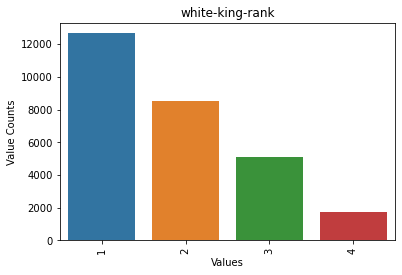

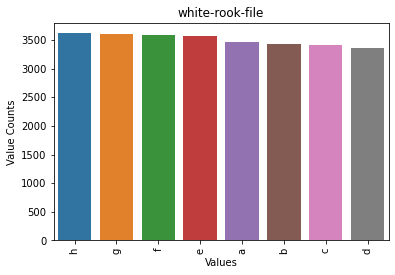

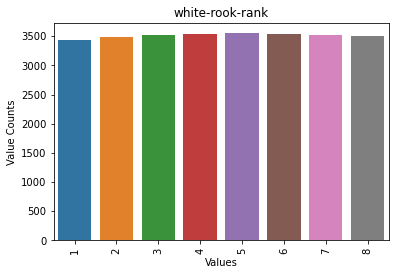

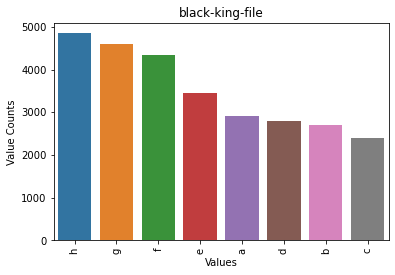

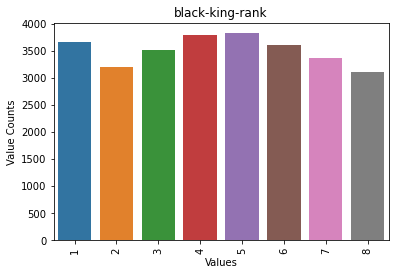

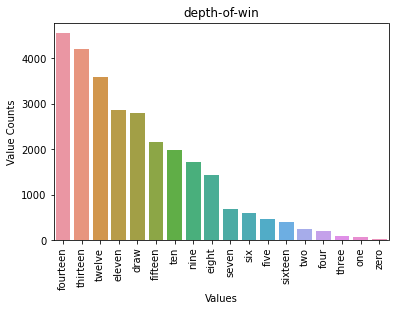

In [12]:
for col in df.columns:
    val_counts = df[col].value_counts()
    ind = val_counts.index
    val = val_counts.values
    sns.barplot(x=ind, y=val)
    plt.title(col)
    plt.ylabel('Value Counts')
    plt.xlabel('Values')
    plt.xticks(rotation=90)
    plt.show()

# Encoding Target Variable

In [13]:
target_encoded = {
    'draw': -1,
    'sixteen' : 16,
    'fifteen' : 15,
    'fourteen' : 14,
    'thirteen' : 13,
    'twelve' : 12,
    'eleven' : 11,
    'ten' : 10,
    'nine' : 9,
    'eight' : 8,
    'seven' : 7,
    'six' : 6,
    'five' : 5,
    'four' : 4,
    'three' : 3,
    'two' : 2,
    'one' : 1,
    'zero' : 0
}

In [14]:
df['depth-of-win'].replace(target_encoded, inplace=True)
df['depth-of-win'] = df['depth-of-win'].astype(np.int64)

In [15]:
df['depth-of-win'].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16], dtype=int64)

## Encoding the independent features

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
categorical_variables = ['white-king-file', 'white-rook-file', 'black-king-file']
for col in categorical_variables:
    df[col] = le.fit_transform(df[col])

In [18]:
df.head()

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,depth-of-win
0,0,1,1,3,2,2,-1
1,0,1,2,1,2,2,-1
2,0,1,2,1,3,1,-1
3,0,1,2,1,3,2,-1
4,0,1,2,2,2,1,-1


# Developing Model

In [19]:
X = df.drop('depth-of-win', axis=1)
y = df['depth-of-win']

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
tree = DecisionTreeClassifier()

In [24]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
tree.score(X_train, y_train)

1.0

In [26]:
y_pred = tree.predict(X_train)

## Evaluation

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
conf_mx = confusion_matrix(y_train, y_pred)
conf_mx

array([[1976,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,   18,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,    0,   49,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  169,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,   55,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  130,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  324,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  412,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],


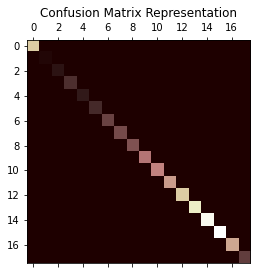

In [29]:
plt.matshow(conf_mx, cmap=plt.cm.pink)
plt.title('Confusion Matrix Representation')
plt.show()

## Testing on Test Data

In [30]:
y_pred = tree.predict(X_test)

In [31]:
conf_mx = confusion_matrix(y_test, y_pred)

array([[ 636,    0,    0,    0,    1,    1,    1,    2,   11,    9,   14,
          20,   25,   29,   21,   25,   17,    8],
       [   2,    7,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,    0,   24,    0,    0,    0,    0,    0,    0,    1,    3,
           0,    1,    0,    0,    0,    0,    0],
       [   1,    0,    4,   69,    1,    0,    0,    0,    0,    0,    0,
           0,    1,    0,    0,    0,    1,    0],
       [   0,    0,    1,    1,   21,    2,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    7,   50,    2,    1,    4,    2,    0,
           1,    1,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    2,    1,  132,    7,    1,    1,    0,
           0,    2,    1,    0,    0,    0,    0],
       [   5,    0,    0,    0,    0,    1,    2,  148,   13,    5,    1,
           3,    1,    0,    1,    0,    0,    0],


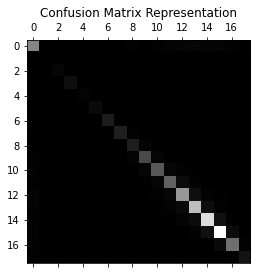

In [32]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.title('Confusion Matrix Representation')
plt.show()

## Plotting Errors

In [33]:
row_sum = conf_mx.sum(axis=1, keepdims=True)

In [34]:
error_conf_mx = conf_mx / row_sum

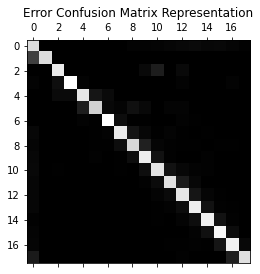

In [35]:
plt.matshow(error_conf_mx, cmap=plt.cm.gray)
plt.title('Error Confusion Matrix Representation')
plt.show()

## Checking F1 Score

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_test, y_pred, average='weighted')

0.8286365722928876

## Result
Getting an accuracy of 0.82 on test set.